In [1]:
%matplotlib inline
from ecell4 import *
from ecell4_base.core import *
from ecell4_base import *

In [2]:
radius, D = 0.005, 1
with species_attributes():
    A | B | C | {"radius": radius, "D": D}

with reaction_rules():
    A + B == C | (0.01, 0.3)

m = get_model()

In [3]:
def run(factory, observers):
    w = factory.world(ones())
    w.bind_to(m) #XXX: depends on m.
    w.add_molecules(Species("A"), 60)
    w.add_molecules(Species("B"), 60)

    sim = factory.simulator(w)
    sim.run(5.0, observers)

In [4]:
# factory = gillespie.Factory()
factory = spatiocyte.Factory(radius)
# factory = meso.Factory(Integer3(5, 5, 5))
# factory = bd.Factory()
# factory = egfrd.Factory(Integer3(4, 4, 4))

obs1 = NumberObserver(["A", "C"])
run(factory, obs1)

In [5]:
obs2 = FixedIntervalNumberObserver(0.2, ["A", "C"])
run(ode.Factory(), obs2)

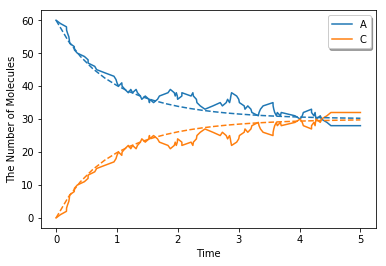

In [6]:
viz.plot_number_observer(obs1, '-', obs2, '--')